<a href="https://colab.research.google.com/github/Raagulbharatwaj/BERT/blob/main/Chapter-1%20Extracting%20Contextual%20Embedding%20using%20BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Context the core of Natural Language Processing**

**Why Context is important?**

We want computers to  be as intelligent as humans.
Humans understand interpret and respond to their peers by realising the context of what their peers speak.

**First of all What is this context?**

**Consider the following Example**
1. Sentence A:   He got bit by Python.
2. Sentence B:   Python is my favorite programming language. 

By reading the preceding two sentences, we can
understand that the meaning of the word
'Python' is different in both sentences. 

In sentence A, the word 'Python' refers to the snake.

while in sentence B, the word 'Python' refers to the programming language


1.  From human perspective is both the 'Python' same?

2. One of the biggest problems in NLP is preserving the context.

3.   Do we call a model intelligent if it tells python has same semantic meaning in both the sentence?

4.   How to make the models to understand the context?


Let us see one more Example


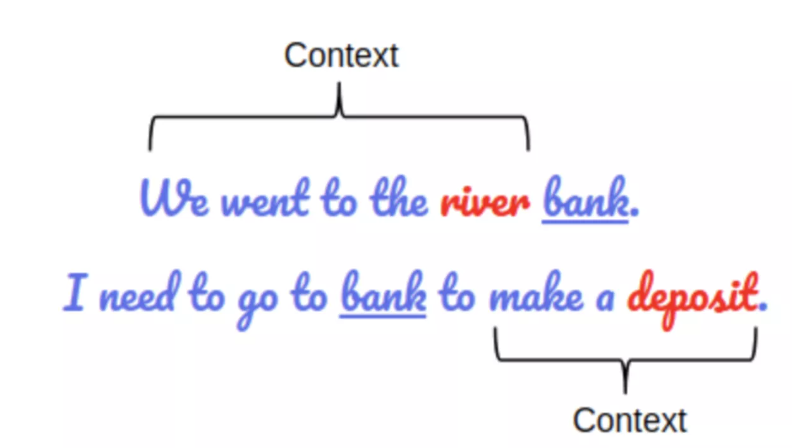

Thus it bocomes inevitable to understand the context of a sentence to understand what a word essentially means.

**Context refers to the semanitic relationships existing betwwen the words of a sentence**

# **A quick recall on what embeddings are**

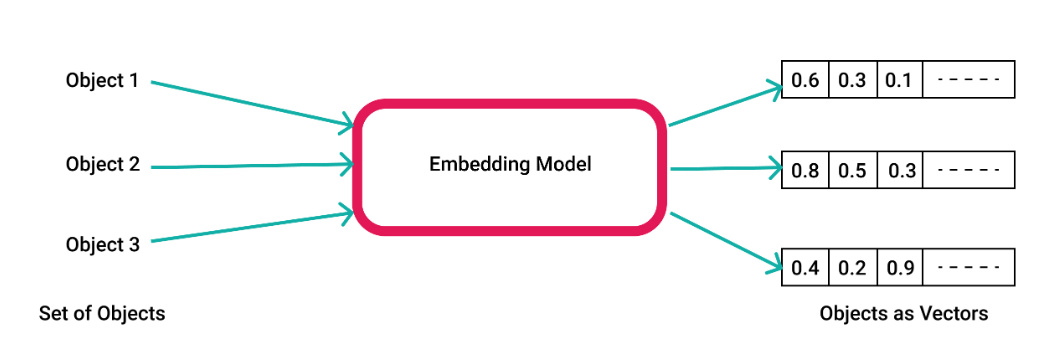

**As embeddings are vector representations of our input sequence it is essential for them to be contextual**

**With respect to our previous example the word "Python" in both sentences should have different embeddings**

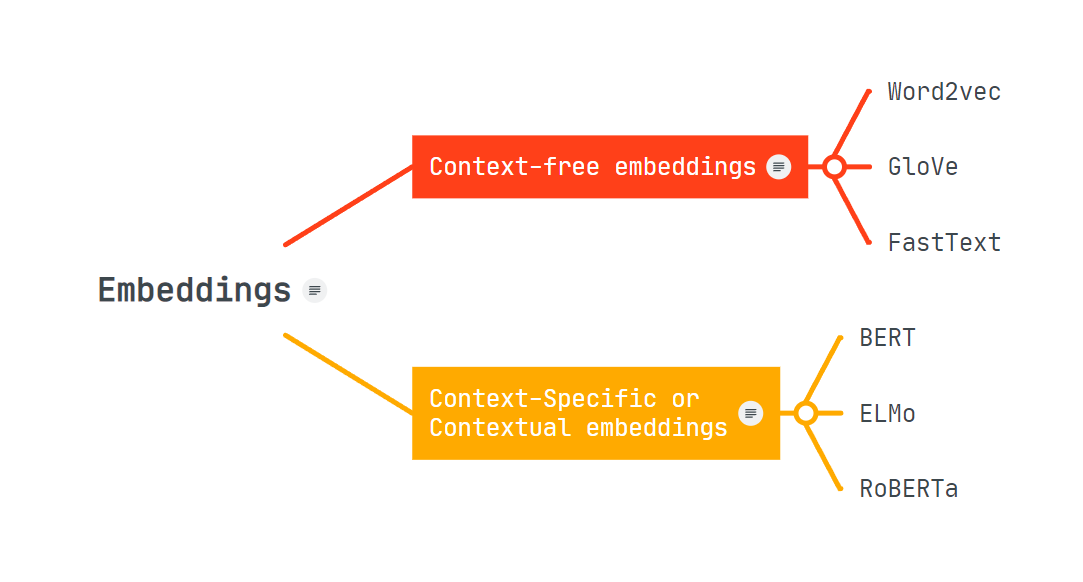


#**Objectives of this module**

>### 1.   **Understanding the importance of context in NLP**
>### 2.   **Obtaining Contextual Embeddings from BERT**
>### 3.   **Visualizing the Contextual Embeddings generated by BERT** 



# **Converting input embeddings into contextual embeddings using BERT to analyse the semantics of the given sequence**


## **Don't Forget 🤗 Before you start**

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 4.7 MB/s 
     |████████████████████████████████| 120 kB 52.3 MB/s 
     |████████████████████████████████| 6.6 MB 36.9 MB/s 


In [2]:
from transformers import BertModel,BertTokenizer
import torch


##**Obtaining Contextual Embeddings from BERT**

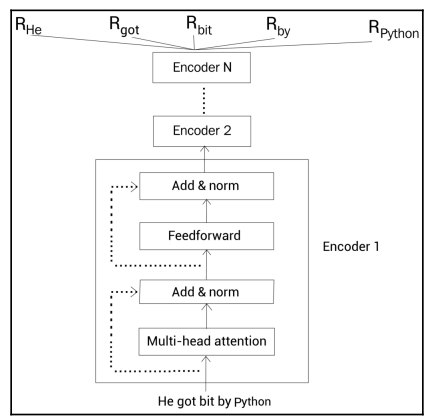

 
### **Instantiating BERT Tokenizer** 

Before feeding the input to BERT, we convert the input into embeddings using the three
embedding layers indicated here:

1.   Token embedding
2.   Segment embedding
3.   Position embedding 

Let's understand how each of these embedding layers work one by one

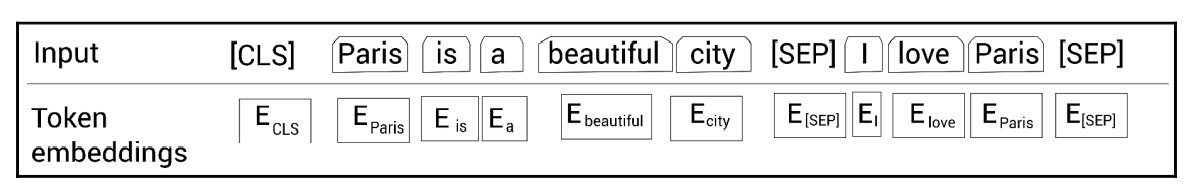

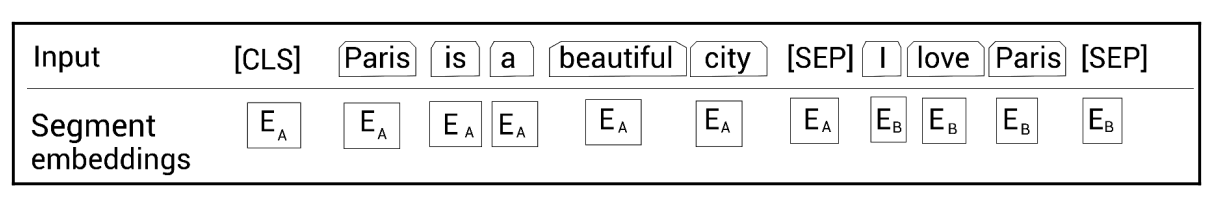

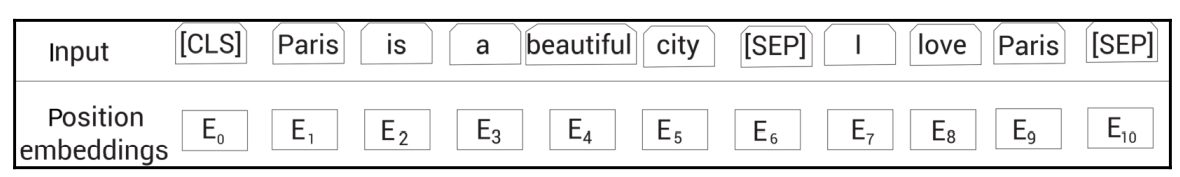

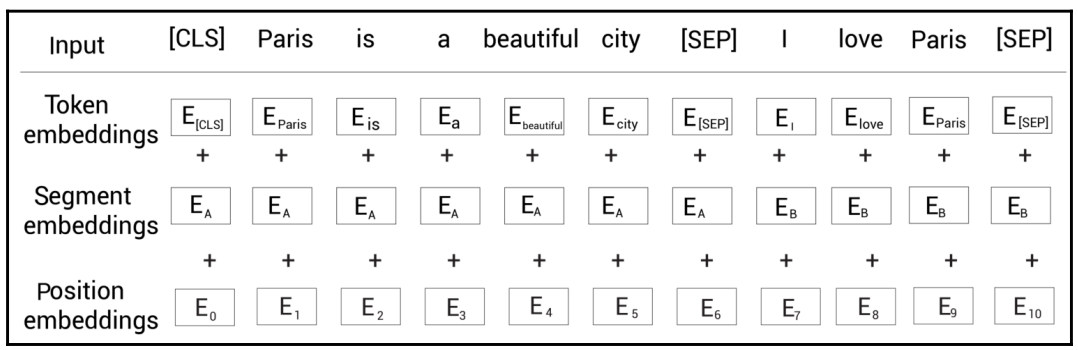



*   Eeach one of these embedding will be done by BERT tokenizer itself
*   This can be verified by decoding the tokens
*   That's what we are going to do now






In [3]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [4]:
print(type(tokenizer))

<class 'transformers.models.bert.tokenization_bert.BertTokenizer'>


In [5]:
seq1 = tokenizer("I love Python")
seq2 = tokenizer("My friend got bitten by a Python")

In [6]:
seq1

{'input_ids': [101, 1045, 2293, 18750, 102], 'token_type_ids': [0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1]}

In [7]:
seq2

{'input_ids': [101, 2026, 2767, 2288, 19026, 2011, 1037, 18750, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [8]:
tokenizer.decode(seq1.input_ids)

'[CLS] i love python [SEP]'

In [9]:
tokenizer.decode(seq2.input_ids)

'[CLS] my friend got bitten by a python [SEP]'

### **Getting Representations from BERT**

Excellent so far so good we have obtained correct input embeddings so what's left let's give it to pretrained BERT-base

In [10]:
model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Our BERT is ready now

can we give it the input embeddings to obtain contextual embeddings now?


In [11]:
rep1 = model(**seq1)

AttributeError: ignored

**OOPS not quite there 😓**

One more step!


The above line fails as the model expects it's input to be Tensors 

let's do that

In [12]:
seq1 = tokenizer("I love Python",return_tensors = "pt")
seq2 = tokenizer("My friend got bitten by a Python",return_tensors="pt")

In [13]:
rep1 = model(**seq1)

Excellent everything looks fine now

Let's Proceed

In [14]:
vect1 = rep1.last_hidden_state

In [15]:
vect1

tensor([[[ 0.0161,  0.2863,  0.0034,  ..., -0.2664,  0.0261,  0.1067],
         [ 0.2179,  0.4228,  0.3737,  ..., -0.3785,  0.4568,  0.3196],
         [ 0.8045,  0.7133,  0.6747,  ..., -0.4853,  0.3542, -0.0167],
         [-0.5676, -0.1475, -0.1150,  ...,  0.6145,  0.3059, -0.2942],
         [ 0.7353,  0.2802, -0.0891,  ..., -0.4089, -0.7614, -0.3000]]],
       grad_fn=<NativeLayerNormBackward0>)

In [16]:
rep2 = model(**seq2)

In [17]:
vect2 = rep2.last_hidden_state

In [18]:
vect2

tensor([[[ 0.1780,  0.2634, -0.3101,  ..., -0.3565,  0.1511,  0.4646],
         [ 0.1424, -0.2776, -0.0896,  ..., -0.1086,  0.1686,  0.3043],
         [-0.0537, -0.3585,  0.3081,  ...,  0.0081, -0.0080,  0.6875],
         ...,
         [-0.0434,  0.1184, -0.7070,  ..., -0.6580,  0.1771,  0.5430],
         [-0.2135,  0.3380, -1.4982,  ..., -0.0998, -0.2282,  0.0751],
         [ 0.7526,  0.2634, -0.3876,  ..., -0.0345, -0.5274, -0.4284]]],
       grad_fn=<NativeLayerNormBackward0>)

## **Visualizing the Contextual Embeddings generated by BERT**

We have got a 768 dimension vector What to do with that?

Let's convert our tensors to numpy arrays and proceed.

In [19]:
import numpy as np
from numpy.linalg import norm

In [20]:
rep_python_seq1 = vect1[0][-2]
rep_python_seq2 = vect2[0][-2]

In [21]:
rep_python_seq1 = np.array(rep_python_seq1.tolist())
rep_python_seq2 = np.array(rep_python_seq2.tolist())

In [22]:
rep_python_seq1

array([-5.67568481e-01, -1.47522762e-01, -1.15024738e-01,  1.10645168e-01,
        5.38331047e-02, -7.24714808e-03, -9.26112384e-02,  4.38374221e-01,
       -1.66499540e-01, -4.72974889e-02, -7.56735682e-01, -6.41936362e-02,
        1.42030865e-01,  5.89757204e-01, -2.41378710e-01,  9.89595428e-02,
        2.93665648e-01,  5.74719846e-01, -2.94538498e-01,  2.84092367e-01,
       -3.44631299e-02, -1.11548863e-01, -4.92342189e-02, -4.25453573e-01,
       -2.66217321e-01,  3.82678956e-01,  5.13687581e-02, -1.45050615e-01,
        2.57000118e-01,  2.73712546e-01,  3.91698964e-02,  1.74759760e-01,
        6.17498517e-01,  7.54433572e-01, -1.75808400e-01, -4.02714580e-01,
        9.04493313e-03,  2.62375474e-01, -2.50761956e-01, -1.84672505e-01,
        8.55902135e-01, -1.48113668e-01,  1.90912098e-01, -9.50451970e-01,
        4.07536067e-02, -1.23205476e-01, -1.41580030e-01, -3.62063259e-01,
        2.49353781e-01, -2.15038568e-01, -3.74613315e-01,  1.66474387e-01,
       -5.37074029e-01,  

In [23]:
rep_python_seq2

array([-2.13494852e-01,  3.37998450e-01, -1.49824405e+00, -5.01228571e-01,
        1.38913214e-01,  4.46144044e-01,  6.01392210e-01,  1.55514038e+00,
       -6.51732445e-01,  1.93732426e-01,  3.77336144e-01,  4.33520600e-02,
       -2.29016673e-02,  2.99858809e-01, -5.97064137e-01, -9.40742910e-01,
        1.47333546e-02, -2.56264687e-01, -3.81804734e-01,  5.33963740e-01,
        1.52631626e-01, -1.75309181e-01, -6.32132471e-01,  5.84168024e-02,
        4.27088022e-01,  1.03269875e+00, -2.54386336e-01,  9.43297923e-01,
       -4.16350484e-01, -1.34235993e-01,  3.38296950e-01,  1.02233648e-01,
        8.21905851e-01,  6.38595998e-01, -3.36003751e-01, -4.05884326e-01,
       -2.14778587e-01,  4.48051319e-02, -6.42179608e-01,  3.63554597e-01,
       -1.10530525e-01, -4.09904569e-01, -3.59483510e-02, -8.18349794e-02,
        1.93918690e-01,  2.14932859e-01,  1.00192547e+00, -5.32470822e-01,
        3.69840354e-01, -6.91666827e-02, -6.28492832e-01,  4.93092149e-01,
       -1.53177011e+00, -

### **Simarity of vecotrs with Cosine Similarity**

**What is cosine similarity?**

Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. It is often used to measure document similarity in text analysis.


$cosine~similarity = \frac{A.B}{||A||.||B||}$

In [24]:
dot = np.dot(rep_python_seq1,rep_python_seq2)

In [25]:
norm1 = norm(rep_python_seq1)
norm2 = norm(rep_python_seq2)

In [26]:
dot

110.22401178822619

In [27]:
norm1

13.82499538099249

In [28]:
norm2

15.50101022016286

In [29]:
cosine_similarity = dot/(norm1*norm2)

In [30]:
cosine_similarity

0.5143410846456383

**This clearly tells us that the vecotor representation of Pythhon in both the sentences are different**

### **Visual Interpretaion of contextual embedding**

We will use a third-party tool to visualize the higher dimensional embedding in 2 dimensions along the principal components 

**[VISBERT](https://visbert.demo.datexis.com/)**

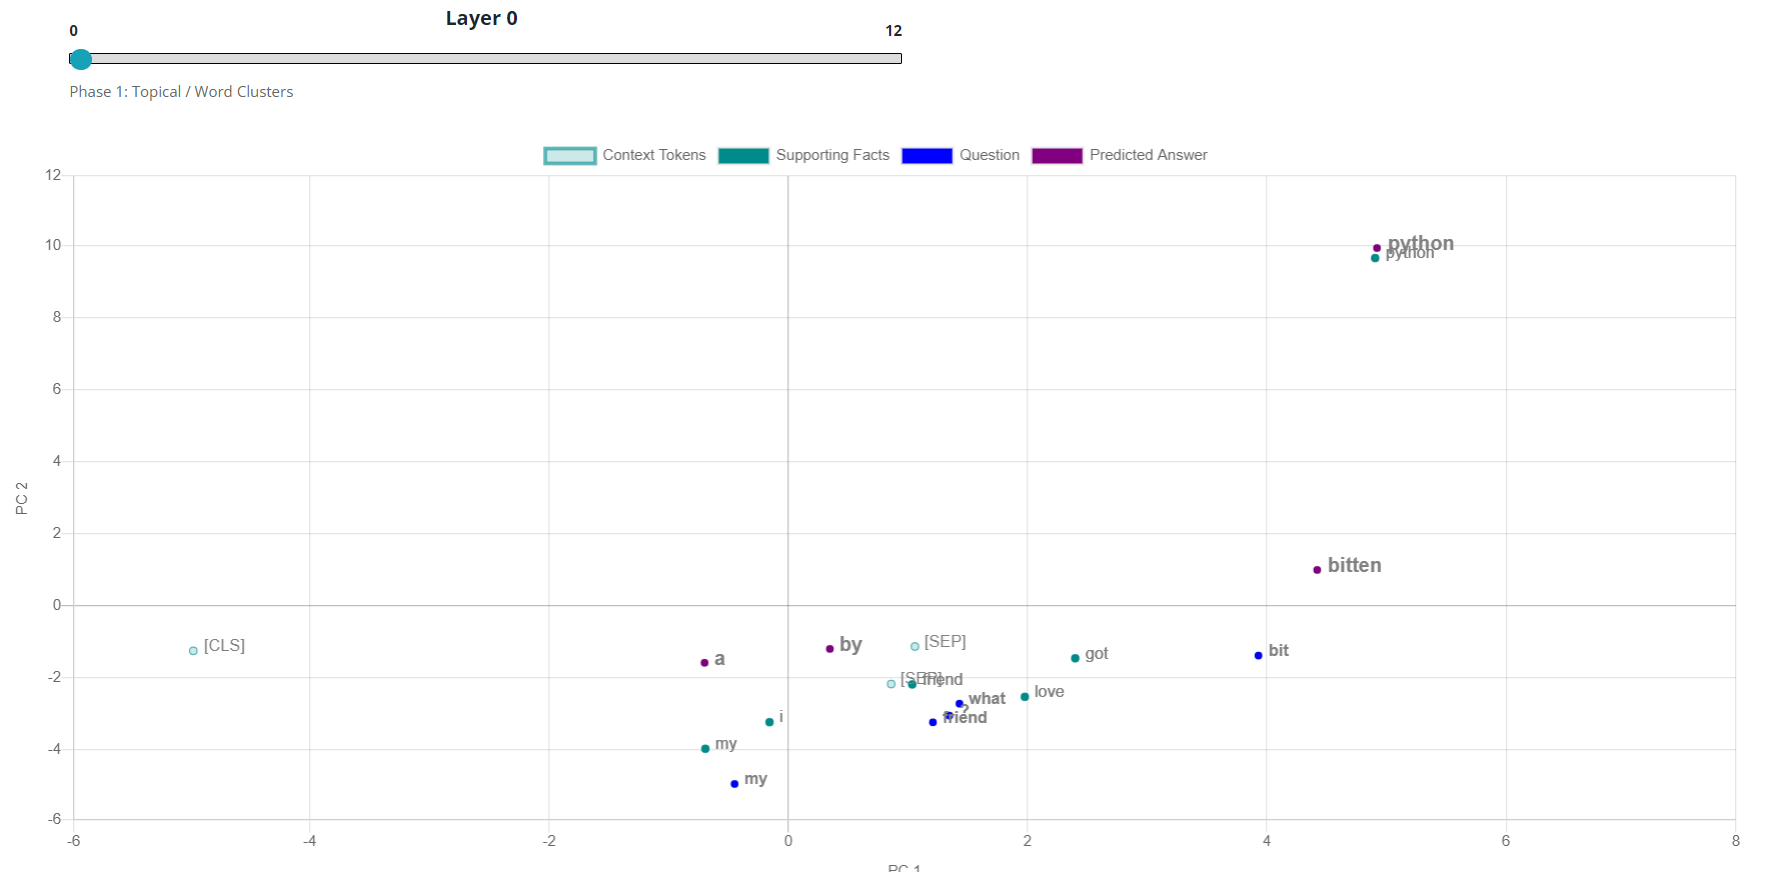

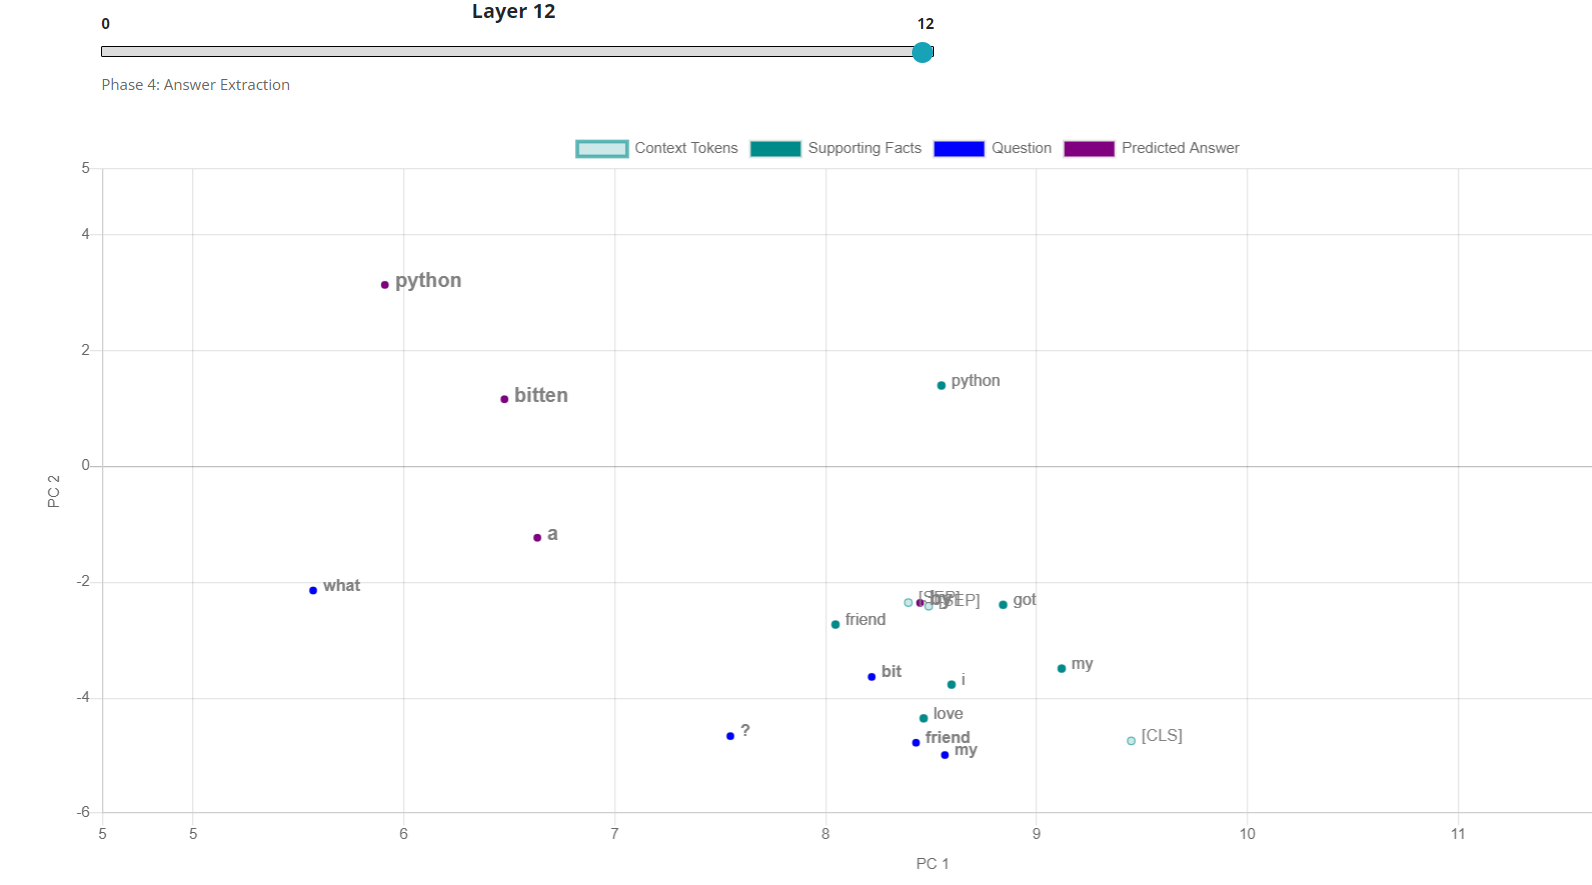

# **BONUS :Tokenizing multiple sentences**

To decode the tokenization of multiple sentences we will use batch decode insted of decode.

Don't hesitate to try this out in your free time!

In [31]:
sentence1 = "Hello everyone!" 
sentence2 = "Welcome to BERT Training."
sentence3 = "BERT is cool isn't it?"
sentences = [sentence1,sentence2,sentence3]

In [32]:
encoding = tokenizer(sentences)

In [34]:
tokenizer.batch_decode(encoding.input_ids)

['[CLS] hello everyone! [SEP]',
 '[CLS] welcome to bert training. [SEP]',
 "[CLS] bert is cool isn't it? [SEP]"]

In [35]:
encoding

{'input_ids': [[101, 7592, 3071, 999, 102], [101, 6160, 2000, 14324, 2731, 1012, 102], [101, 14324, 2003, 4658, 3475, 1005, 1056, 2009, 1029, 102]], 'token_type_ids': [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}